# Chapter 2

## Fig 2.04 Exponential decay

In [1]:
using Plots
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

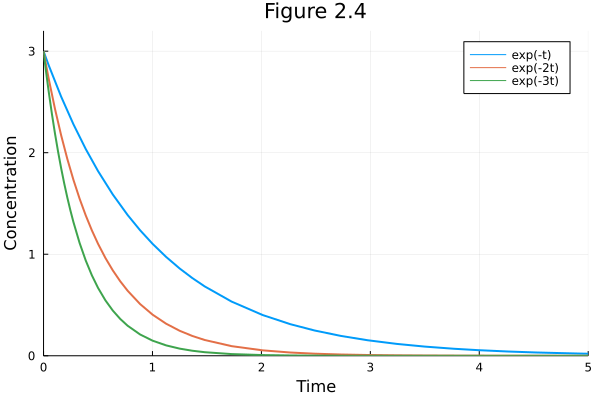

In [2]:
plot([t-> 3 * exp(-t) t->3 * exp(-2t) t-> 3 * exp(-3t)], 
     0.0, 5.0, 
     xlim = (0, 5), ylim=(0, 3.2),
     xlabel="Time", ylabel="Concentration", 
     label = ["exp(-t)" "exp(-2t)" "exp(-3t)"], 
     title= "Figure 2.4")

## Fig 2.09 

Numerical Simulation of a metabolic network

In [3]:
using DifferentialEquations
using Catalyst
using ModelingToolkit
using Plots
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [4]:
# Convenience functions
hill(x, k) = x / (x + k)
hill(x, k, n) = hill(x^n, k^n)

hill (generic function with 2 methods)

In [5]:
# Model building
net = @reaction_network begin
    3.0, ∅ --> A
    2.0, A --> B
    2.5, A + B --> C + D
    3.0, C --> ∅
    3.0, D --> ∅
end

Model ##ReactionSystem#275 with 5 equations
States (4):
  A(t)
  B(t)
  C(t)
  D(t)
Parameters (0):

In [6]:
odesys = convert(ODESystem, net)

Model ##ReactionSystem#275 with 4 equations
States (4):
  A(t)
  B(t)
  C(t)
  D(t)
Parameters (0):

In [7]:
speciesmap(net)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 4 entries:
  C(t) => 3
  B(t) => 2
  D(t) => 4
  A(t) => 1

In [8]:
u0 = zeros(4)
tend = 10.0
sol = solve(ODEProblem(net, u0, tend))

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 30-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0010999999999999998
  0.011099999999999997
  0.03416738935703762
  0.06493821924885028
  0.10129342853323639
  0.14525435522588204
  0.19819668175417032
  0.26286632617142736
  0.3419742044838213
  0.44080774819296664
  0.5771315889770864
  ⋮
  1.830014996960646
  2.197707449847055
  2.5929228500390114
  3.070988404563895
  3.635005117769844
  4.345026331828728
  5.236474357258272
  6.330695654007515
  7.48438122559773
  8.528826753577082
  9.447758784257482
 10.0
u: 30-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0]
 [0.00029997000199933764, 2.999799953754866e-8, 5.623912546644786e-16, 5.623912546644786e-16]
 [0.003296372652316679, 3.627331236355826e-6, 8.218056460901692e-12, 8.218056460901692e-12]
 [0.0329330063952576, 0.00036682535223159706, 8.356768013816546e-8, 8.356768013816546

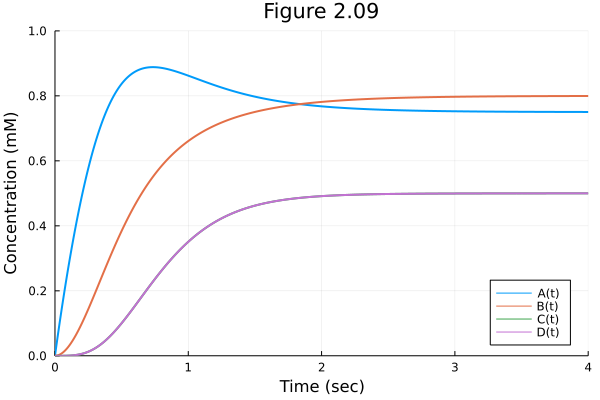

In [9]:
plot(sol, xlims=(0.0, 4.0), ylims=(0.0, 1.0), 
     xlabel="Time (sec)", ylabel="Concentration (mM)", title="Figure 2.09",
     legend=:bottomright)

## Figure 2.11-14 

Model reduction of ODE metabolic networks

In [10]:
using DifferentialEquations
using Catalyst
using ModelingToolkit
using Plots
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [11]:
fullModel = @reaction_network begin
    k_0, 0 --> A
    (k_1, k_m1), A <--> B
    k_2, B --> 0
end k_0 k_1 k_m1 k_2

Model ##ReactionSystem#277 with 4 equations
States (2):
  A(t)
  B(t)
Parameters (4):
  k_0
  k_1
  k_m1
  k_2

In [12]:
fullSys = convert(ODESystem, fullModel)

Model ##ReactionSystem#277 with 2 equations
States (2):
  A(t)
  B(t)
Parameters (4):
  k_0
  k_1
  k_m1
  k_2

In [13]:
speciesmap(fullSys)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 2 entries:
  B(t) => 2
  A(t) => 1

In [14]:
paramsmap(fullSys)

Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 4 entries:
  k_1  => 2
  k_m1 => 3
  k_2  => 4
  k_0  => 1

In [15]:
params = [0, 9, 12, 2]
u0 = [0.0, 10.0]
tend = 3.0

3.0

In [16]:
sol1full = solve(ODEProblem(fullSys, u0, tend, params))

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 34-element Vector{Float64}:
 0.0
 8.33250002662905e-6
 9.165750029291953e-5
 0.0009249075029558242
 0.004925551957360877
 0.012950994749922366
 0.024203391128378236
 0.038677031180770836
 0.05687483166343594
 0.07885039492957484
 0.10491523817786631
 0.13531140529312286
 0.1705820700118174
 ⋮
 1.2744818843056707
 1.4489348748297772
 1.6048514708614612
 1.7517916610977329
 1.8976419883558948
 2.0465347038843515
 2.199447628741752
 2.355340092851258
 2.5124114680760106
 2.669195880837852
 2.8250503110720735
 3.0
u: 34-element Vector{Vector{Float64}}:
 [0.0, 10.0]
 [0.0009998041949395534, 9.99883355552422]
 [0.010987314386434823, 9.987180710981443]
 [0.10981641889273347, 9.871804396920822]
 [0.5587745957878649, 9.345993056329629]
 [1.3433471904639458, 8.41906301057267]
 [2.2233611426294853, 7.361953762978557]
 [3.0603231262423427, 6.327621109139267]
 [3

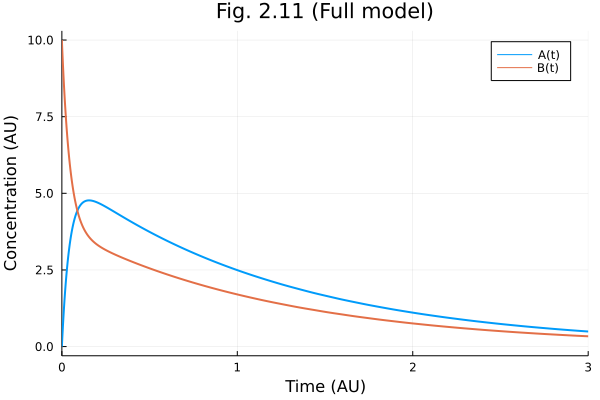

In [17]:
plot(sol1full, xlabel="Time (AU)", ylabel="Concentration (AU)", title="Fig. 2.11 (Full model)")

## Figure 2.12 : Rapid equilibrium assumption

In [18]:
reModel = @reaction_network begin
    (k_0, hill(k_1, k_2, k_m1, 1)), 0 <--> B
end k_0 k_1 k_m1 k_2

Model ##ReactionSystem#279 with 2 equations
States (1):
  B(t)
Parameters (4):
  k_0
  k_1
  k_m1
  k_2

In [19]:
speciesmap(reModel)

Dict{Term{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 1 entry:
  B(t) => 1

In [20]:
paramsmap(reModel)

Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 4 entries:
  k_1  => 2
  k_m1 => 3
  k_2  => 4
  k_0  => 1

In [21]:
u0re = [sum(u0)]
sol1re = solve(ODEProblem(reModel, u0re, tend, params));

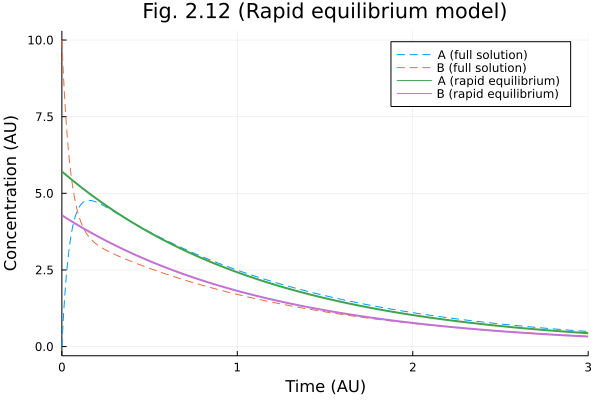

In [22]:
pl2 = plot(sol1full, line=(:dash, 1),label=["A (full solution)" "B (full solution)"])

fracA = params[3] / (params[3] + params[2])
fracB = 1 - fracA

plot!(pl2, sol1re, vars=((t, b̃)-> (t, b̃ * fracA), 0, 1), 
        label="A (rapid equilibrium)")
plot!(pl2, sol1re, vars=((t, b̃)-> (t, b̃ * fracB), 0, 1), 
        label="B (rapid equilibrium)")
plot!(pl2, title="Fig. 2.12 (Rapid equilibrium model)", 
        xlabel="Time (AU)", ylabel="Concentration (AU)")

## Figure 2.13: Rapid equilibrium 

with another set of parameters not suitable for Rapid equilibrium assumption.

In [23]:
tspan = 3.0
params = [9, 20, 12, 2]
u0 = [8, 4]
u0re = [sum(u0)]
sol2full = solve(ODEProblem(fullModel, u0, tspan, params));
sol2re = solve(ODEProblem(reModel, u0re, tspan, params));

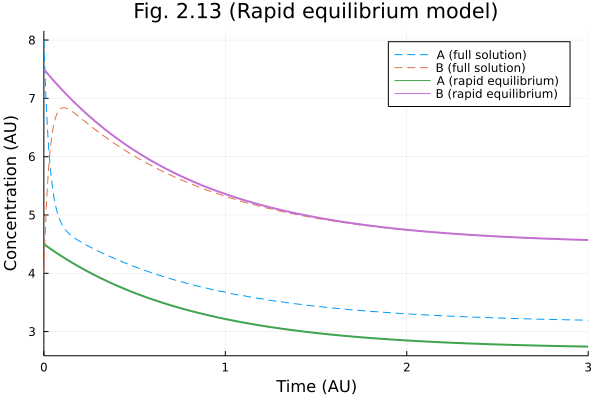

In [24]:
pl3 = plot(sol2full, line=(:dash, 1),label=["A (full solution)" "B (full solution)"])

fracA = params[3] / (params[3] + params[2])
fracB = 1 - fracA

plot!(pl3, sol2re, vars=((t, b̃)-> (t, b̃ * fracA), 0, 1), 
        label="A (rapid equilibrium)")
plot!(pl3, sol2re, vars=((t, b̃)-> (t, b̃ * fracB), 0, 1), 
        label="B (rapid equilibrium)")
plot!(pl3, title="Fig. 2.13 (Rapid equilibrium model)", 
        xlabel="Time (AU)", ylabel="Concentration (AU)")

## Figure 2.14 : QSSA

Quasi-steady state assumption on species A

In [25]:
qssModel = @reaction_network begin
    (k_0, k_2), 0 <--> B
end k_0 k_2

# The initial conditions in QSSA could be tricky
qss_u0(u0, k0, k1, km1, k2) = (k1 * sum(u0) - k0) / (k1 + km1)

qss_u0 (generic function with 1 method)

In [26]:
k0, k1, km1, k2 = params
u0qss = qss_u0(u0, k0, k1, km1, k2)

7.21875

In [27]:
paramsmap(qssModel)

Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64} with 2 entries:
  k_2 => 2
  k_0 => 1

In [28]:
sol2qss = solve(ODEProblem(qssModel, [u0qss], tend, (k0, k2)))

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 11-element Vector{Float64}:
 0.0
 0.09213371408627077
 0.2580853720636457
 0.4579200621558787
 0.7105343618980664
 1.0087389653938472
 1.3646427736700562
 1.7813285063703053
 2.2736033718179636
 2.8565649829195463
 3.0
u: 11-element Vector{Vector{Float64}}:
 [7.21875]
 [6.761220680089925]
 [6.1225543617019555]
 [5.58799115197771]
 [5.156461132335911]
 [4.861574032821357]
 [4.677452865250186]
 [4.577129224759847]
 [4.528831295794885]
 [4.509002568723836]
 [4.506757412085525]

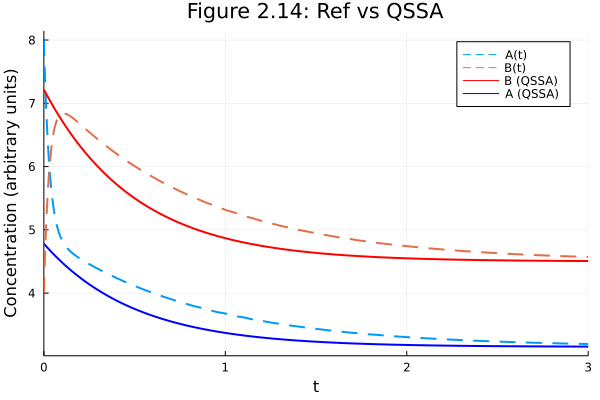

In [29]:
pl4 = plot(sol2full, line=(:dash, 2), xlims=tspan,
 xlabel="Time (arbitrary units)",
 ylabel="Concentration (arbitrary units)",
 title="Figure 2.14: Ref vs QSSA")

plot!(pl4, sol2qss, label="B (QSSA)", line=(2, :red))
plot!(pl4, sol2qss , vars= ((t, b) -> (t, (k0 + km1*b)/k1), 0, 1), label="A (QSSA)", line=(2, :blue))

## Problem 2.4.6

In [30]:
using Plots, DifferentialEquations
Plots.gr(lw=2, fmt=:png)

Plots.GRBackend()

In [31]:
# Model
f(u, p, t) = p * (1.0-u)

f (generic function with 1 method)

In [32]:
p = 1.0
u0 = 0.0
tspan = 10.0

10.0

In [33]:
prob = ODEProblem(f, u0, tspan, p)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 10.0)
u0: 0.0

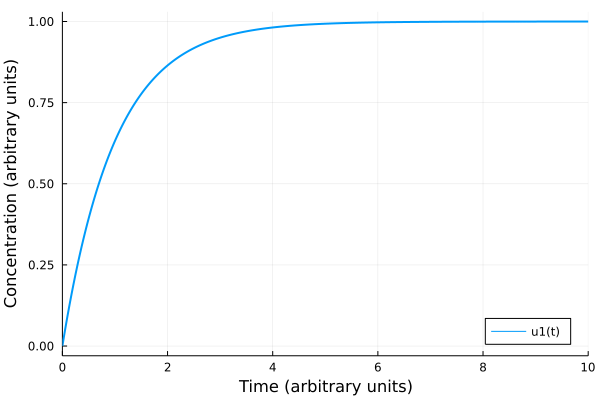

In [34]:
sol = solve(prob)
plot(sol, xlabel="Time (arbitrary units)", ylabel="Concentration (arbitrary units)", legend=:bottomright)